In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import re

Загрузим данные, посмотрим на структуру и приведем в удобный для анализа вид.

In [89]:
df_prices = pd.read_csv('TeddyFoodPrices.csv')

In [90]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13318 entries, 0 to 13317
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Идентификатор пользователя  13318 non-null  int64  
 1   Название приюта             13318 non-null  object 
 2   Дата/время платежа          13318 non-null  object 
 3   Наименование услуги         13318 non-null  object 
 4   Сумма платежа               13318 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 520.4+ KB


In [91]:
df_prices.columns = ['user_id', 'shelter', 'date', 'item', 'price']

In [92]:
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_prices.head()

,user_id,shelter,date,item,price
0,27542,Кот и Пёс,2019-09-01 01:02:25,ПёсоДень,155.0
1,26869,Матроскин,2019-09-01 01:03:41,Стерилизация,350.0
2,26869,Люськин дом,2019-09-01 01:03:41,1 КотоДень,87.0
3,26869,Убежище,2019-09-01 01:03:41,1 КотоДень,114.0
4,4696,"Кошачий приют ""ДОМИК""",2019-09-01 03:18:44,1 КотоНеделя,855.0


Посмотрим на средний чек для пользователя.

In [217]:
df_prices.groupby(['user_id', 'date'])['price'].sum().median()

181.5

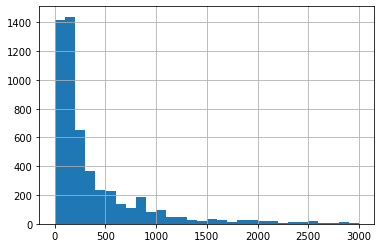

In [116]:
df_prices.groupby(['user_id', 'date'])['price'].sum().hist(bins=30, range=(0, 3000))

Выделим разные категории покупок.

In [93]:
def categorize(str):
    if 'Кото' in str:
        return "cat"
    if 'Пёсо' in str:
        return "dog"
    else:
        return "else"

In [94]:
df_prices['type'] = df_prices['item'].apply(categorize)

In [105]:
df_prices_cats = df_prices[df_prices['type'] == 'cat'].copy()
df_prices_dogs = df_prices[df_prices['type'] == 'dog'].copy()

Выберем данные только по котодням, котонеделям и котомесецам.

In [106]:
df_prices_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5381 entries, 2 to 13316
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user_id  5381 non-null   int64         
 1   shelter  5381 non-null   object        
 2   date     5381 non-null   datetime64[ns]
 3   item     5381 non-null   object        
 4   price    5381 non-null   float64       
 5   type     5381 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 294.3+ KB


In [107]:
df_prices_cats['item'].unique()

array(['1 КотоДень', '1 КотоНеделя', 'КотоНеделя', 'КотоДень', 'Котодень',
       '1 КотоМесяц', 'КотоМесяц', ' Новогодний КотоНабор',
       'Новогодний КотоНабор'], dtype=object)

In [108]:
df_prices_cats['item'] = df_prices_cats['item'].apply(lambda x: re.sub(r"\d+", "", x).strip().lower())

In [109]:
df_prices_cats = df_prices_cats[df_prices_cats['item'] != 'новогодний котонабор']

Посмотрим на цены вообщем для этих товаров.

In [110]:
df_prices_cats.groupby('item')['price'].mean()

item
котодень       100.620910
котомесяц     3109.578947
котонеделя     814.465211
Name: price, dtype: float64

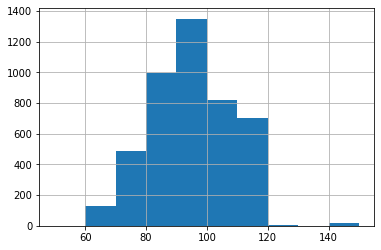

In [101]:
df_prices_cats[df_prices_cats['item'] == 'котодень']['price'].hist(bins=10, range=(50, 150))

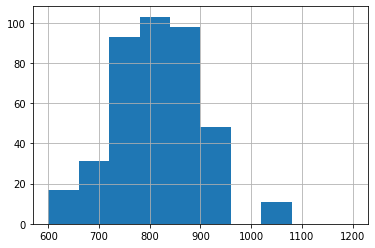

In [102]:
df_prices_cats[df_prices_cats['item'] == 'котонеделя']['price'].hist(bins=10, range=(600, 1200))

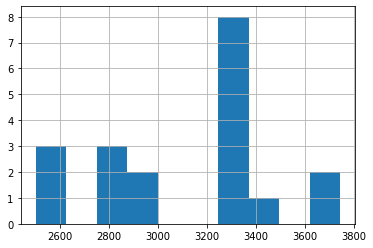

In [103]:
df_prices_cats[df_prices_cats['item'] == 'котомесяц']['price'].hist(bins=10)

Мы видим, что популярнее всего Котодни за 100 рублей, Котонедели менее популярны их сцена около 800 рублей и Котомесяцы вообще редко приобретают.

Посмотрим на данные по отдельным приютам

In [119]:
df_prices_cats.groupby('shelter')['user_id'].count()

shelter
Добрые сердца                                 354
Кот и Пёс                                     188
Котофей                                       640
Кошачий приют "ДОМИК"                         629
Люськин дом                                   490
Лёхин дом                                     323
Матроскин                                     258
Приют для кошек "Потеряшка"                   287
Приют для кошек "ЯрКот"                       401
Самарский приют для животных "НадеждА"        609
Убежище                                       459
ФлагманВет                                     31
Центральный приют Спб для бездомных кошек!    315
Name: user_id, dtype: int64

Посмотрим на цены для конкретного приюта

In [151]:
# создадим таблицу с количество транзакций и количеством денег, которые получил приют от Кото товаров
df_shelters = df_prices_cats.groupby('shelter')['price'].sum().reset_index()

In [154]:
df_shelters['sales_amount'] = df_prices_cats.groupby('shelter')['user_id'].count().reset_index()['user_id']
df_shelters

,shelter,price,sales_amount
0,Добрые сердца,70336.00,354
1,Кот и Пёс,34223.00,188
2,Котофей,97091.72,640
3,"Кошачий приют ""ДОМИК""",79210.19,629
4,Люськин дом,94132.78,490
5,Лёхин дом,65193.00,323
6,Матроскин,45635.73,258
7,"Приют для кошек ""Потеряшка""",56420.00,287
8,"Приют для кошек ""ЯрКот""",66241.38,401
9,"Самарский приют для животных ""НадеждА""",107503.00,609


In [155]:
# добавим сколько приходится на ону транзакцию
df_shelters['price_per_sale'] = df_shelters['price'] / df_shelters['sales_amount']
df_shelters

,shelter,price,sales_amount,price_per_sale
0,Добрые сердца,70336.00,354,198.689266
1,Кот и Пёс,34223.00,188,182.037234
2,Котофей,97091.72,640,151.705813
3,"Кошачий приют ""ДОМИК""",79210.19,629,125.930350
4,Люськин дом,94132.78,490,192.107714
5,Лёхин дом,65193.00,323,201.835913
6,Матроскин,45635.73,258,176.882674
7,"Приют для кошек ""Потеряшка""",56420.00,287,196.585366
8,"Приют для кошек ""ЯрКот""",66241.38,401,165.190474
9,"Самарский приют для животных ""НадеждА""",107503.00,609,176.523810


Добавим значения стоимости Котодня, Котонедели и Котомесяца. Так же добавим какой процент состовляют Котодни и Котонедели от общего числа Котопродуктов.

In [238]:
days = []
week = []
month = []
d1 = []
d2 = []
for i in df_shelters['shelter'].to_list():
    d = df_prices_cats[(df_prices_cats['shelter'] == i) & (df_prices_cats['item'] == 'котодень')]['price'].median()
    w = df_prices_cats[(df_prices_cats['shelter'] == i) & (df_prices_cats['item'] == 'котонеделя')]['price'].median()
    m = df_prices_cats[(df_prices_cats['shelter'] == i) & (df_prices_cats['item'] == 'котомесяц')]['price'].median()
    dolya = df_prices_cats[(df_prices_cats['shelter'] == i) & (df_prices_cats['item'] == 'котодень')]['price'].count() / df_shelters[df_shelters['shelter'] == i]['sales_amount']
    dolya2 = df_prices_cats[(df_prices_cats['shelter'] == i) & (df_prices_cats['item'] == 'котонеделя')]['price'].count() / df_shelters[df_shelters['shelter'] == i]['sales_amount']
    days.append(d)
    week.append(w)
    month.append(m)
    d1.append(float("{0:.2f}".format(float(dolya))))
    d2.append(float("{0:.2f}".format(float(dolya2))))

In [239]:
df_shelters['day'] = days
df_shelters['week'] = week
df_shelters['month'] = month
df_shelters['day_all'] = d1
df_shelters['week_all'] = d2
df_shelters

,shelter,price,sales_amount,price_per_sale,day,week,month,day_all,week_all
0,Добрые сердца,70336.00,354,198.689266,99.0,958.0,3249.0,0.92,0.08
1,Кот и Пёс,34223.00,188,182.037234,94.0,710.0,NaN,0.86,0.14
2,Котофей,97091.72,640,151.705813,87.0,723.0,2500.0,0.91,0.08
3,"Кошачий приют ""ДОМИК""",79210.19,629,125.930350,76.0,720.0,NaN,0.92,0.08
4,Люськин дом,94132.78,490,192.107714,97.0,837.0,2968.0,0.89,0.11
5,Лёхин дом,65193.00,323,201.835913,116.0,1077.0,3745.0,0.96,0.03
6,Матроскин,45635.73,258,176.882674,98.0,825.0,3280.0,0.90,0.10
7,"Приют для кошек ""Потеряшка""",56420.00,287,196.585366,104.0,870.0,3300.0,0.92,0.06
8,"Приют для кошек ""ЯрКот""",66241.38,401,165.190474,88.0,832.0,2835.0,0.92,0.08
9,"Самарский приют для животных ""НадеждА""",107503.00,609,176.523810,105.0,870.0,3300.0,0.91,0.09


Мы видим, что подавляющую часть продаж состовляют Котодни. Есть несколько приютов с хорошими показателями. Посмотрим на ситуации для собак.

In [192]:
df_prices_dogs['item'] = df_prices_dogs['item'].apply(lambda x: re.sub(r"\d+", "", x).strip().lower())
df_prices_dogs = df_prices_dogs[df_prices_dogs['item'] != 'новогодний пёсонабор']

In [193]:
df_prices_dogs.groupby('shelter')['user_id'].count()

shelter
4 лапы                  231
Кот и Пёс               314
Лаюшки и Мяушки         367
Мокрый нос              649
Шереметьевский приют    149
Name: user_id, dtype: int64

In [194]:
df_shelters2 = df_prices_dogs.groupby('shelter')['price'].sum().reset_index()
df_shelters2['sales_amount'] = df_prices_dogs.groupby('shelter')['user_id'].count().reset_index()['user_id']
df_shelters2['price_per_sale'] = df_shelters2['price'] / df_shelters2['sales_amount']
df_shelters2

,shelter,price,sales_amount,price_per_sale
0,4 лапы,53642.99,231,232.220736
1,Кот и Пёс,81460.52,314,259.428408
2,Лаюшки и Мяушки,87804.43,367,239.249128
3,Мокрый нос,152725.76,649,235.324746
4,Шереметьевский приют,71888.31,149,482.471879


In [235]:
days = []
week = []
month = []
d1 = []
d2 = []
for i in df_shelters2['shelter'].to_list():
    d = df_prices_dogs[(df_prices_dogs['shelter'] == i) & (df_prices_dogs['item'] == 'пёсодень')]['price'].median()
    w = df_prices_dogs[(df_prices_dogs['shelter'] == i) & (df_prices_dogs['item'] == 'пёсонеделя')]['price'].median()
    m = df_prices_dogs[(df_prices_dogs['shelter'] == i) & (df_prices_dogs['item'] == 'пёсомесяц')]['price'].median()
    dolya = df_prices_dogs[(df_prices_dogs['shelter'] == i) & (df_prices_dogs['item'] == 'пёсодень')]['price'].count() / df_shelters2[df_shelters2['shelter'] == i]['sales_amount']
    dolya2 = df_prices_dogs[(df_prices_dogs['shelter'] == i) & (df_prices_dogs['item'] == 'пёсонеделя')]['price'].count() / df_shelters2[df_shelters2['shelter'] == i]['sales_amount']
    days.append(d)
    week.append(w)
    month.append(m)
    d1.append(float("{0:.2f}".format(float(dolya))))
    d2.append(float("{0:.2f}".format(float(dolya2))))

In [236]:
df_shelters2['day'] = days
df_shelters2['week'] = week
df_shelters2['month'] = month
df_shelters2['day_all'] = d1
df_shelters2['week_all'] = d2
df_shelters2

,shelter,price,sales_amount,price_per_sale,day,week,month,day_all,week_all
0,4 лапы,53642.99,231,232.220736,155.0,860.0,3100.0,0.90,0.09
1,Кот и Пёс,81460.52,314,259.428408,155.0,800.0,3050.0,0.85,0.15
2,Лаюшки и Мяушки,87804.43,367,239.249128,155.0,800.0,NaN,0.88,0.12
3,Мокрый нос,152725.76,649,235.324746,145.0,887.0,2530.0,0.90,0.09
4,Шереметьевский приют,71888.31,149,482.471879,295.0,1950.0,7360.0,0.90,0.09


In [237]:
df_shelters2['week_all'].mean()

0.10799999999999998

In [240]:
df_shelters['week_all'].mean()

0.08461538461538462

Составив таблицу для собак, мы можем заметить, что прибыль у собак гораздо выше при похожих количествах транзакций. Это связано с тем, что цена за день у них выше, но стоит заметить что ценовое предложение отличается. У собак в цену Пёсодня входит рекламма, что оправдывает более высокую цену, но при этом оно так же делает выгодным предложения Пёсонеделя и Пёсомесяц. И это приводит к не намного, но более высоким покупкам Недель. Текущее предложение Котопродуктов делает не целесообразным покупку чего-либо кроме Котодня из-за неясной цены рекламмы.

In [219]:
(df_shelters2['day'] - df_shelters2['week'] / 7).mean()

29.657142857142855

In [220]:
(df_shelters2['day'] - df_shelters2['month'] / 30).mean()

53.833333333333336

In [231]:
def cal(x):
    day = x + 53
    week = (day - 30) * 7
    month = x * 30
    print(day, week, month)

In [232]:
cal(100)

153 861 3000


Функция выше на основе информации из ценообразовния Пёсопродуктов расчитывает цены по минимальной цене за день

Гипотезы по ценообразованию

1) Более четкое определение рекламмы поможет пользователям определить ее ценность и приведет к лучшим покзателям, в случае ценообразования для Котопродуктов

2) Пересчет предложения на стоимость в день может помочь пользователю потратить больше денег за один раз